<a href="https://colab.research.google.com/github/HumbertoJRR/Precticas/blob/main/CLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Importamos las librerias que se utilizaran
import numpy as np # linear algebra
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
#Leemos nuestro csv
CLV=pd.read_csv('/content/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
CLV.head(4)

,num de cliente,Estado,CLV,Response,cobertura,Educacion,Effective To Date,Estatus de empleo,Genero,Ingresos,...,Meses desde incio de la poliza,Num quejas abiertas,Numero de polizas,tipo de poliza,poliza,Tipo de oferta de renovacion,canal de venta,Importe total de la reclamacion,clase de vehiculo,tam del vehiculo
0,FQ61281,Oregon,83325.38119,No,Extended,High School or Below,1/31/11,Employed,M,58958,...,74,0,2,Personal Auto,Personal L3,Offer1,Call Center,1108.800000,Luxury Car,Small
1,YC54142,Washington,74228.51604,No,Extended,High School or Below,1/26/11,Unemployed,M,0,...,34,0,2,Personal Auto,Personal L1,Offer1,Branch,1742.400000,Luxury Car,Medsize
2,BP23267,California,73225.95652,No,Extended,Bachelor,02/09/2011,Employed,F,39547,...,21,0,2,Personal Auto,Personal L3,Offer1,Branch,969.600000,Luxury SUV,Medsize
3,KH55886,Oregon,67907.27050,No,Premium,Bachelor,02/05/2011,Employed,M,78310,...,18,1,2,Personal Auto,Personal L1,Offer1,Agent,151.711475,Sports Car,Medsize


In [10]:
#Eliminamos el numero de cliente ya que no aporta nada para nuestro modelo
CLV=CLV.drop(['num de cliente'], axis=1)
CLV.head(4)

,Estado,CLV,Response,cobertura,Educacion,Effective To Date,Estatus de empleo,Genero,Ingresos,Location Code,...,Meses desde incio de la poliza,Num quejas abiertas,Numero de polizas,tipo de poliza,poliza,Tipo de oferta de renovacion,canal de venta,Importe total de la reclamacion,clase de vehiculo,tam del vehiculo
0,Oregon,83325.38119,No,Extended,High School or Below,1/31/11,Employed,M,58958,Suburban,...,74,0,2,Personal Auto,Personal L3,Offer1,Call Center,1108.800000,Luxury Car,Small
1,Washington,74228.51604,No,Extended,High School or Below,1/26/11,Unemployed,M,0,Suburban,...,34,0,2,Personal Auto,Personal L1,Offer1,Branch,1742.400000,Luxury Car,Medsize
2,California,73225.95652,No,Extended,Bachelor,02/09/2011,Employed,F,39547,Suburban,...,21,0,2,Personal Auto,Personal L3,Offer1,Branch,969.600000,Luxury SUV,Medsize
3,Oregon,67907.27050,No,Premium,Bachelor,02/05/2011,Employed,M,78310,Rural,...,18,1,2,Personal Auto,Personal L1,Offer1,Agent,151.711475,Sports Car,Medsize


In [11]:
#23 columnas y 9134 filas
CLV.shape

(9134, 23)

In [13]:
#Los nombres de las columnas son los siguientes
CLV.columns

Index(['Estado', 'CLV', 'Response', 'cobertura', 'Educacion',
       'Effective To Date', 'Estatus de empleo', 'Genero', 'Ingresos',
       'Location Code', 'Estatus marital', 'Monthly Premium Auto',
       'Meses ultima reclamacion', 'Meses desde incio de la poliza',
       'Num quejas abiertas', 'Numero de polizas', 'tipo de poliza', 'poliza',
       'Tipo de oferta de renovacion', 'canal de venta',
       'Importe total de la reclamacion', 'clase de vehiculo',
       'tam del vehiculo'],
      dtype='object')

In [15]:
#Revisamos los valores nulos
#Nuestra base no cuenta con valores nulos en ninguna columna
CLV.isnull().sum()

Estado                             0
CLV                                0
Response                           0
cobertura                          0
Educacion                          0
Effective To Date                  0
Estatus de empleo                  0
Genero                             0
Ingresos                           0
Location Code                      0
Estatus marital                    0
Monthly Premium Auto               0
Meses ultima reclamacion           0
Meses desde incio de la poliza     0
Num quejas abiertas                0
Numero de polizas                  0
tipo de poliza                     0
poliza                             0
Tipo de oferta de renovacion       0
canal de venta                     0
Importe total de la reclamacion    0
clase de vehiculo                  0
tam del vehiculo                   0
dtype: int64

In [16]:
#Revisamos los valores unicos
CLV.nunique()

Estado                                5
CLV                                8041
Response                              2
cobertura                             3
Educacion                             5
Effective To Date                    60
Estatus de empleo                     5
Genero                                2
Ingresos                           5694
Location Code                         3
Estatus marital                       3
Monthly Premium Auto                202
Meses ultima reclamacion             36
Meses desde incio de la poliza      100
Num quejas abiertas                   6
Numero de polizas                     9
tipo de poliza                        3
poliza                                9
Tipo de oferta de renovacion          4
canal de venta                        4
Importe total de la reclamacion    5106
clase de vehiculo                     6
tam del vehiculo                      3
dtype: int64

In [17]:
#Analizamos los valores duplicados
CLV.duplicated().sum()

163

In [20]:
#Eliminamos los valores duplicados
CLV=CLV.drop_duplicates()

In [25]:
#Confirmamos que los valores duplicados estan eliminados
CLV.duplicated().sum()

0

In [27]:
#Arreglamos el formato de la fecha del campo Effective To Date
CLV["Effective To Date"] = pd.to_datetime(CLV['Effective To Date'])

# Vizualizacion de los datos

In [30]:
#Analizamos los datos
CLV.describe()

,CLV,Ingresos,Monthly Premium Auto,Meses ultima reclamacion,Meses desde incio de la poliza,Num quejas abiertas,Numero de polizas,Importe total de la reclamacion
count,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,8004.192319,37644.828113,93.192621,15.099209,48.054175,0.385241,2.970349,433.886437
std,6867.941039,30431.741597,34.358960,10.077668,27.916442,0.909666,2.391832,291.074428
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3999.497700,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,270.472690
50%,5792.439588,33947.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.442328
75%,8954.637109,62365.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.988754
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


**Parece que existe un outliers en las columnas de CLV e importe por reclamacion fuera de esas dos columnas los valores en las demas columnas se ven correctos y coherentes**

# Estatus de empleo

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Estatus de empleo')

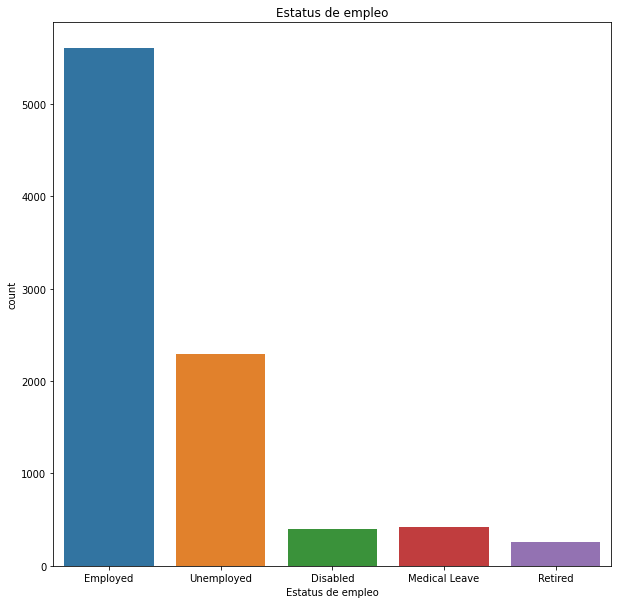

In [32]:
sns.countplot(CLV['Estatus de empleo'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Estatus de empleo')

**La mayoria de los clientes tienen empleo seguido de los que no tienen empleo**

# Relacion entre el tipo de cobertura y el tipo de auto

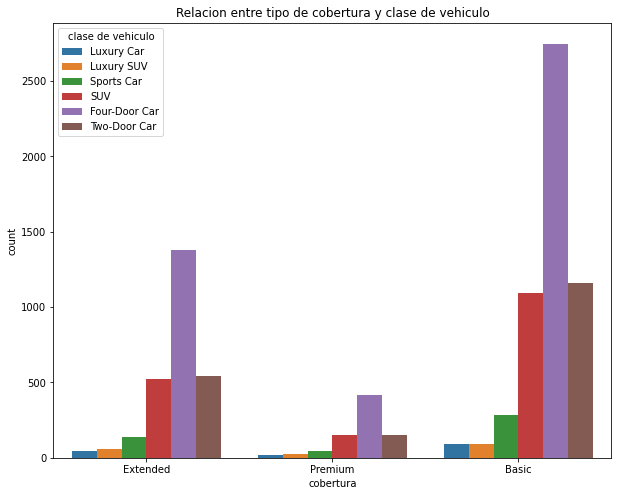

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(x='cobertura',hue='clase de vehiculo',data=CLV)
plt.title('Relacion entre tipo de cobertura y clase de vehiculo')
plt.show()

**Como es de esperarse la mayoria cuenta con la cobertura basica seguida de la extendida y por ultima la cobertura premium**

# Grafico de "PIE" de la clase de vehiculo

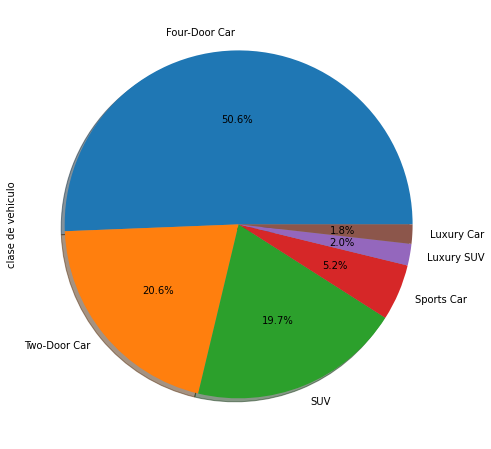

In [34]:
CLV['clase de vehiculo'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

**Observamos que un poco mas mitad de los autos son vehiculos de cuatro puertas**

In [35]:
from wordcloud import WordCloud

# Analizamos la ortografia y distribucion de los estados

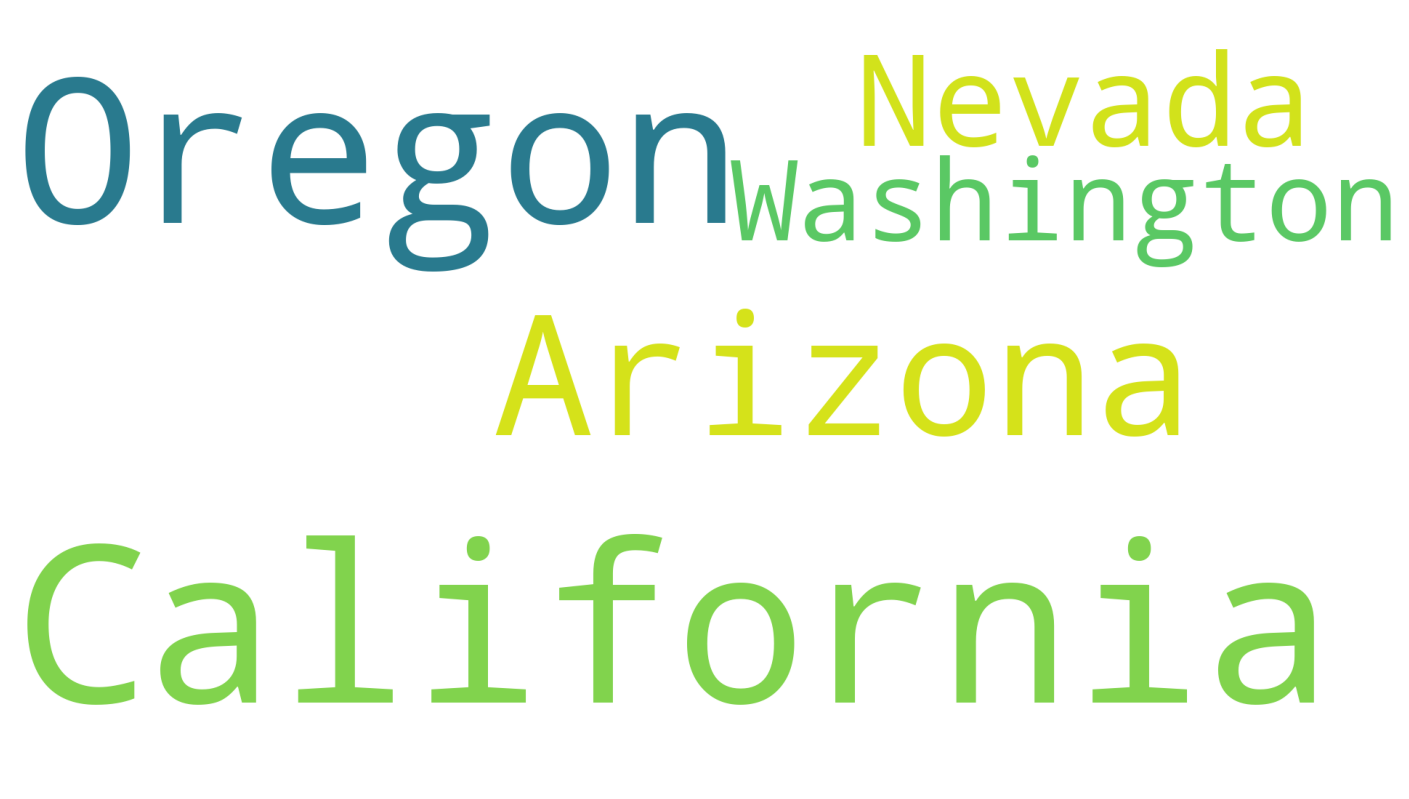

In [37]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(CLV.Estado))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

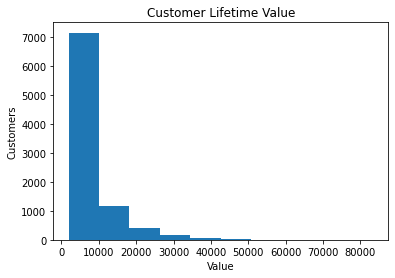

In [39]:
#Graico de CLV por clientes
plt.hist(CLV['CLV'], bins = 10)
plt.title("Customer Lifetime Value") #Assign title 
plt.xlabel("Value") #Assign x label 
plt.ylabel("Customers") #Assign y label 
plt.show()

# Analisis de lo outliers

In [45]:
outliers = CLV[CLV['CLV'] >= 40000]
len(outliers)

58

**Son 58 de alrededor de 9000 los que tienen CLV mayor a 40 mil, aunque es poco el porcentaje de clientes con CLV alto estos datos parecen correctos y representan a los clientes que ofrencen mayor rentabilidad por lo que no es necesario eliminarlos de momento**

# Ahora se transformaran las variables categoricas a variables numericas

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
CLV.head(1)

,Estado,CLV,Response,cobertura,Educacion,Effective To Date,Estatus de empleo,Genero,Ingresos,Location Code,...,Meses desde incio de la poliza,Num quejas abiertas,Numero de polizas,tipo de poliza,poliza,Tipo de oferta de renovacion,canal de venta,Importe total de la reclamacion,clase de vehiculo,tam del vehiculo
0,Oregon,83325.38119,No,Extended,High School or Below,2011-01-31,Employed,M,58958,Suburban,...,74,0,2,Personal Auto,Personal L3,Offer1,Call Center,1108.8,Luxury Car,Small


In [49]:
column_names = ['Estado', 'Response', 'cobertura', 
                     'Educacion', 'Effective To Date', 
                     'Estatus de empleo', 'Genero', 'Location Code',
                     'Estatus marital', 'tipo de poliza', 'poliza',
                     'Tipo de oferta de renovacion', 'canal de venta', 'clase de vehiculo', 'tam del vehiculo']

for col in column_names:
    CLV[col] = le.fit_transform(CLV[col])
    
CLV.head(4)

,Estado,CLV,Response,cobertura,Educacion,Effective To Date,Estatus de empleo,Genero,Ingresos,Location Code,...,Meses desde incio de la poliza,Num quejas abiertas,Numero de polizas,tipo de poliza,poliza,Tipo de oferta de renovacion,canal de venta,Importe total de la reclamacion,clase de vehiculo,tam del vehiculo
0,3,83325.38119,0,1,3,30,1,1,58958,1,...,74,0,2,1,5,0,2,1108.800000,1,2
1,4,74228.51604,0,1,3,25,4,1,0,1,...,34,0,2,1,3,0,1,1742.400000,1,1
2,1,73225.95652,0,1,0,39,1,0,39547,1,...,21,0,2,1,5,0,1,969.600000,2,1
3,3,67907.27050,0,2,0,35,1,1,78310,0,...,18,1,2,1,3,0,0,151.711475,4,1


In [50]:
CLV.dtypes

Estado                               int64
CLV                                float64
Response                             int64
cobertura                            int64
Educacion                            int64
Effective To Date                    int64
Estatus de empleo                    int64
Genero                               int64
Ingresos                             int64
Location Code                        int64
Estatus marital                      int64
Monthly Premium Auto                 int64
Meses ultima reclamacion             int64
Meses desde incio de la poliza       int64
Num quejas abiertas                  int64
Numero de polizas                    int64
tipo de poliza                       int64
poliza                               int64
Tipo de oferta de renovacion         int64
canal de venta                       int64
Importe total de la reclamacion    float64
clase de vehiculo                    int64
tam del vehiculo                     int64
dtype: obje

In [51]:
#transformamos todos los datos a enteros 
CLV['CLV'] = CLV['CLV'].astype(int)
CLV['Importe total de la reclamacion'] = CLV['Importe total de la reclamacion'].astype(int)

In [62]:
CLV.dtypes

Estado                             int64
CLV                                int64
Response                           int64
cobertura                          int64
Educacion                          int64
Effective To Date                  int64
Estatus de empleo                  int64
Genero                             int64
Ingresos                           int64
Location Code                      int64
Estatus marital                    int64
Monthly Premium Auto               int64
Meses ultima reclamacion           int64
Meses desde incio de la poliza     int64
Num quejas abiertas                int64
Numero de polizas                  int64
tipo de poliza                     int64
poliza                             int64
Tipo de oferta de renovacion       int64
canal de venta                     int64
Importe total de la reclamacion    int64
clase de vehiculo                  int64
tam del vehiculo                   int64
dtype: object

# Grafica de la variable respuesta CLV

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/dis

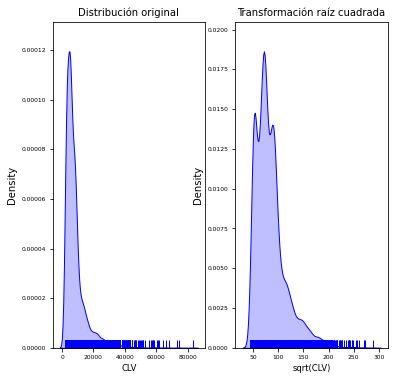

In [54]:
#Grafica de la variable respuesta
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
sns.distplot(
    CLV.CLV,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('CLV', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(CLV.CLV),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(CLV)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

In [55]:
%pip install Fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for Fitter: filename=fitter-1.5.2-py3-none-any.whl size=25609 sha256=c87c5fbb2cf6732dfce1009521dfb1bc5738c5f87c31d24ec1329b266131cdb8
  Stored in directory: /root/.cache/pip/wheels/8e/6b/cb/628035771acab95dc84f200590b4838c7c3095a70ede67a25a
Successfully built Fitter


In [56]:
#distribucion de los datos
from fitter import Fitter, get_common_distributions
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(CLV.CLV, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

Fitting 9 distributions: 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,6.769545e-09,3182.842547,-250367.387162,inf,0.072050,6.084676e-41
expon,7.939184e-09,3081.020414,-248955.823388,inf,0.068555,4.196260e-37
exponpow,1.386786e-08,3778.719655,-243943.028182,inf,0.115506,1.000508e-104
cauchy,1.710659e-08,2779.436679,-242069.206905,inf,0.178231,8.951566e-250
chi2,2.394529e-08,4728.385553,-239043.087569,inf,0.123079,6.734321e-119
logistic,2.466470e-08,4043.659683,-238786.634857,inf,0.169847,1.012780e-226
norm,4.036519e-08,5665.577574,-234367.566894,inf,0.197553,2.836285e-307
powerlaw,4.185148e-08,2358.144029,-234034.079729,inf,0.342655,0.000000e+00
gamma,1.051682e-07,2597.437910,-225767.892908,inf,0.494076,0.000000e+00


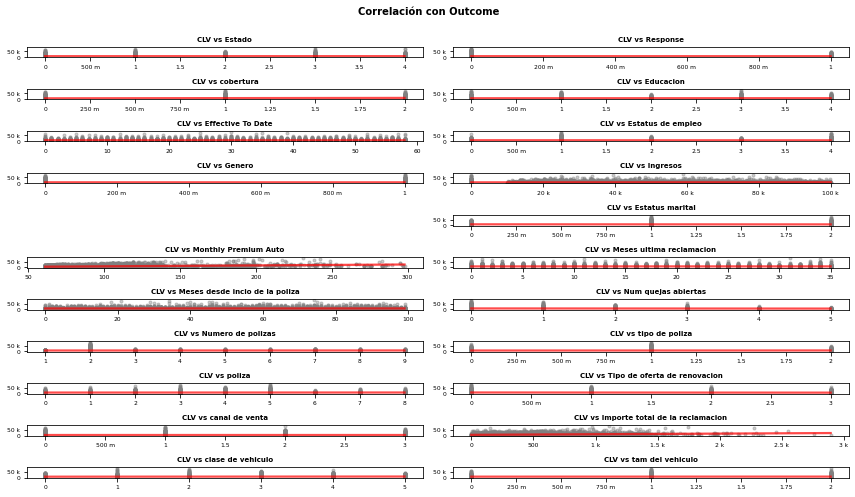

In [70]:
import matplotlib.ticker as ticker
# Gráfico de distribución para cada variable numérica
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(12, 7))
axes = axes.flat
columnas_numeric = CLV.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('CLV')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = CLV[colum],
        y           = CLV['CLV'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"CLV vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Outcome', fontsize = 10, fontweight = "bold");

In [71]:
# Correlación entre columnas numéricas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = CLV.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
385,tipo de poliza,poliza,0.880661,0.880661
407,poliza,tipo de poliza,0.880661,0.880661
190,Ingresos,Estatus de empleo,-0.727705,0.727705
146,Estatus de empleo,Ingresos,-0.727705,0.727705
273,Monthly Premium Auto,Importe total de la reclamacion,0.630990,0.630990
471,Importe total de la reclamacion,Monthly Premium Auto,0.630990,0.630990
256,Monthly Premium Auto,cobertura,0.457853,0.457853
80,cobertura,Monthly Premium Auto,0.457853,0.457853
34,CLV,Monthly Premium Auto,0.398702,0.398702
254,Monthly Premium Auto,CLV,0.398702,0.398702


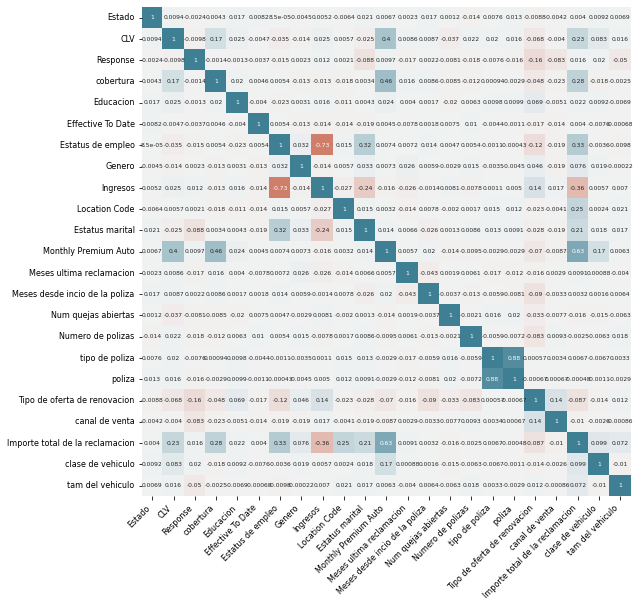

In [74]:
# Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 9))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

En este analisis de correlacion observamos lo siguiente:

- vemos cosas obvias como que el ingreso y el estatus de empleo estan altamente correlacionados
- otra variable que parece correlacionada con otra es la de importe de la reclamacion y monthly premium auto
-Hay alta correlacion entre poliza y tipo de poliza